In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv('dataset.csv')
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,NaN,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1.0,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1.0,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1.0,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,NaN,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


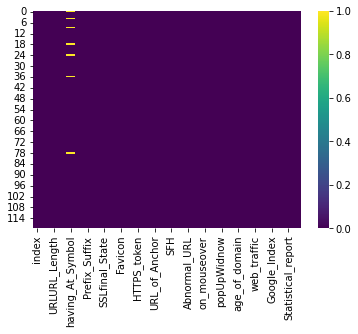

In [ ]:
sns.heatmap(df[0:120].isnull(), cmap= 'viridis')
plt.savefig('heatmap.png')

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
index                          0.000978
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.051330
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229


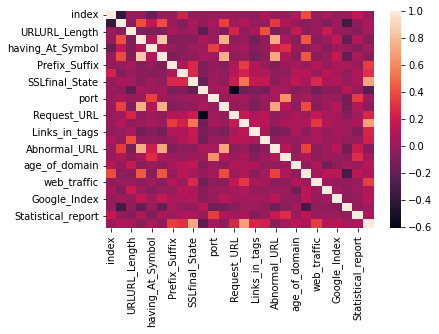

In [ ]:
df.describe()
print(df.corr()['Result'].sort_values())
df.drop(['Favicon','Iframe','Redirect',
                'popUpWidnow','RightClick','Submitting_to_email'],axis=1,inplace=True)
print(len(df.columns))
sns.heatmap(df.corr())

plt.savefig('corr.png')


In [ ]:
l = [1,-1]
length = len(df)
# df.head()
for i in range(length):
  if(df['having_At_Symbol'].isnull().sum()):
    rand = random.randint(0,1)
    df['having_At_Symbol'][i] = l[rand]

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1.0,-1,-1,-1,-1,-1,1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,-1.0,1,-1,0,1,-1,1,-1,1,0,-1,-1,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,-1.0,1,-1,-1,-1,-1,1,-1,1,0,-1,-1,-1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,-1.0,1,-1,-1,-1,1,1,-1,-1,0,0,-1,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1.0,1,-1,1,1,-1,1,1,1,0,0,-1,1,-1,-1,-1,0,-1,1,1,1,1


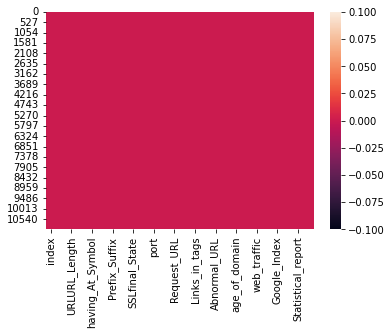

In [ ]:
sns.heatmap(df.isnull())
plt.savefig('clean_heatmap.png')

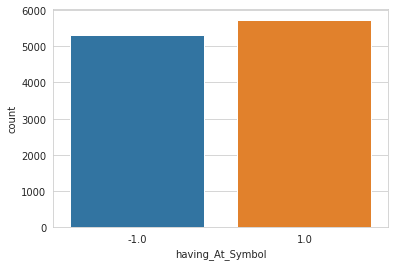

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='having_At_Symbol',data=df)

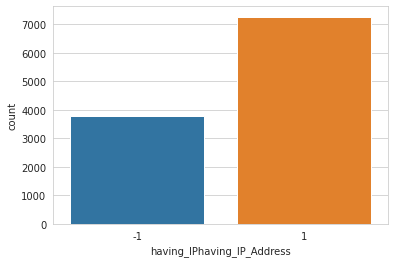

In [ ]:
sns.countplot(x='having_IPhaving_IP_Address',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


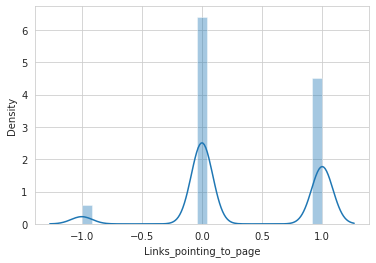

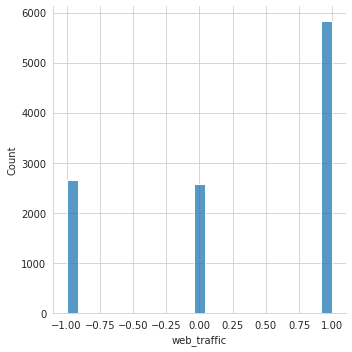

In [ ]:
sns.distplot(df['Links_pointing_to_page'])
sns.displot(df['web_traffic'])

In [ ]:
a=len(df[df.Result==0])
b=len(df[df.Result==-1])
c=len(df[df.Result==1])

In [ ]:
print("Count of Legitimate Websites = ", b)
print("Count of Suspicious Websites = ", a)
print("Count of Phishy Websites = ", c)

Count of Legitimate Websites =  4898
Count of Suspicious Websites =  0
Count of Phishy Websites =  6157


In [ ]:
df.drop(['index'],axis=1,inplace=True)
print(len(df.columns))

25


In [ ]:
df.corr()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IPhaving_IP_Address,1.000000,-0.052411,0.403461,-0.011688,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.060979,0.363534,0.029773,0.099847,0.006212,-0.010962,0.336549,0.084059,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URLURL_Length,-0.052411,1.000000,-0.097881,-0.010929,-0.081247,0.055247,0.003997,0.048754,-0.221892,0.000323,-0.089383,0.246348,-0.023396,0.052869,0.414196,-0.106761,-0.045103,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,0.403461,-0.097881,1.000000,0.003746,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.002201,0.757838,-0.037235,0.000561,-0.133379,-0.022723,0.739290,0.062383,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,-0.011688,-0.010929,0.003746,1.000000,0.007659,0.002742,0.011360,0.004206,-0.011336,0.048110,0.007631,0.014914,0.006026,0.001753,0.006444,0.020904,0.036945,0.036068,0.040194,0.001022,-0.009643,0.006405,-0.013830,0.028132,0.010748
double_slash_redirecting,0.397389,-0.081247,0.842796,0.007659,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.025060,0.760799,-0.026368,-0.005036,-0.125583,-0.041672,0.723724,0.086635,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.005257,0.055247,-0.080471,0.002742,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.022546,-0.070153,0.098675,0.348871,0.100254,0.001326,-0.077620,0.012578,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,-0.080745,0.003997,-0.041916,0.011360,-0.043079,0.087891,1.000000,0.267649,-0.082839,0.004863,-0.037239,0.104857,0.229491,0.093646,0.096089,-0.034908,-0.018082,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,0.071414,0.048754,-0.061426,0.004206,-0.036200,0.261391,0.267649,1.000000,-0.193622,0.027473,-0.029941,0.193054,0.535786,0.176825,0.171402,-0.046245,0.023586,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.022739,-0.221892,0.060923,-0.011336,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.022478,0.059161,-0.609970,-0.160257,-0.101084,-0.136422,0.058109,0.023784,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789
port,0.060979,0.000323,0.002201,0.048110,0.025060,-0.022546,0.004863,0.027473,0.022478,1.000000,0.004999,0.027561,0.039891,-0.066502,0.006672,0.054126,0.623298,0.008459,0.054849,-0.028543,0.017954,-0.005413,-0.139104,0.343987,0.036419


In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
X= df.drop(columns='Result')
X.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1.0,-1,-1,-1,-1,-1,1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,-1.0,1,-1,0,1,-1,1,-1,1,0,-1,-1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,-1.0,1,-1,-1,-1,-1,1,-1,1,0,-1,-1,-1,1,1,-1,1,-1,1,0,-1
3,1,0,1,-1.0,1,-1,-1,-1,1,1,-1,-1,0,0,-1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1.0,1,-1,1,1,-1,1,1,1,0,0,-1,1,-1,-1,-1,0,-1,1,1,1


In [ ]:
Y=df['Result']
Y=pd.DataFrame(Y)
Y.head()

,Result
0,-1
1,-1
2,-1
3,-1
4,1


In [ ]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.40,random_state=10)
print("Training set has {} samples.".format(train_X.shape[0]))
print("Testing set has {} samples.".format(test_X.shape[0]))

Training set has 6633 samples.
Testing set has 4422 samples.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
logreg_predict= model_1.predict(test_X)
print('The accurcy of Logistic Regression Model is : ', 100.0 * accuracy_score(logreg_predict,test_Y))

The accurcy of Logistic Regression Model is :  92.7860696517413


In [ ]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.90      0.93      0.92      1863
           1       0.95      0.93      0.94      2559

    accuracy                           0.93      4422
   macro avg       0.92      0.93      0.93      4422
weighted avg       0.93      0.93      0.93      4422



In [ ]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

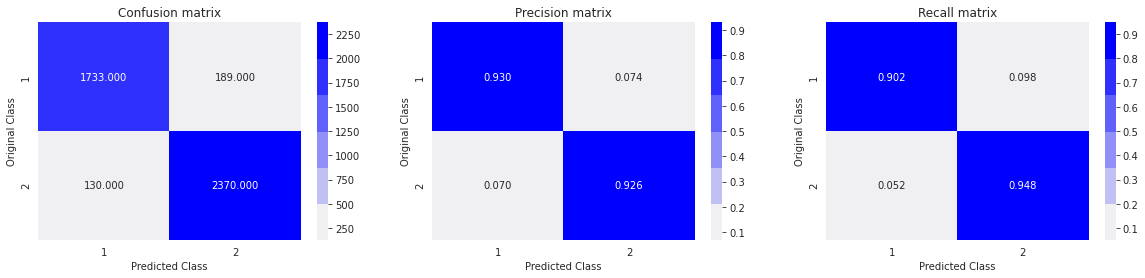

In [ ]:
plot_confusion_matrix(test_Y, logreg_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


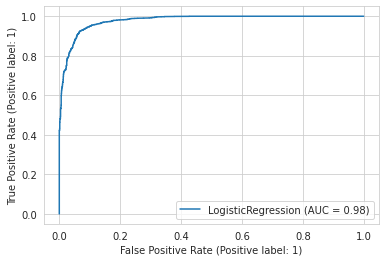

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model_1,test_X, test_Y)

**KNN**

It algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

Text(0, 0.5, 'Error Rate')

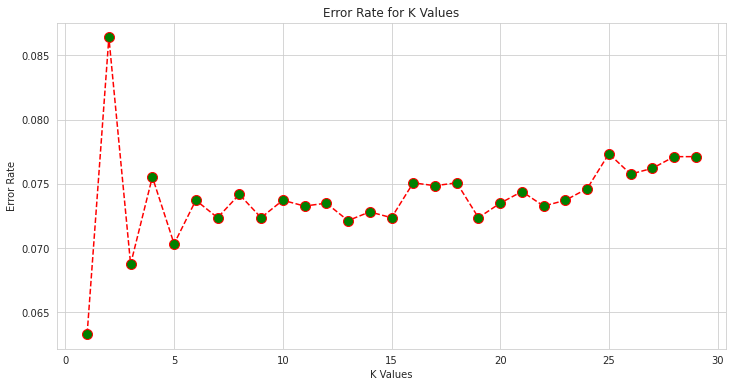

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range(1, 30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(train_X, train_Y.values.ravel())
  pred_i = knn.predict(test_X)
  error.append(np.mean(pred_i != test_Y.values.ravel()))

plt.figure(figsize=(12,6))
plt.plot(range(1,30), error, color='red', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('Error Rate for K Values')
plt.xlabel('K Values')
plt.ylabel('Error Rate')

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
model_2= knn.fit(train_X,train_Y)
knn_predict=model_2.predict(test_X)
print('The accuracy of KNN Model is: ', 100.0 * accuracy_score(knn_predict,test_Y))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The accuracy of KNN Model is:  93.66802351876979


In [ ]:
print(classification_report(test_Y,knn_predict))

              precision    recall  f1-score   support

          -1       0.92      0.94      0.93      1922
           1       0.95      0.94      0.94      2500

    accuracy                           0.94      4422
   macro avg       0.93      0.94      0.94      4422
weighted avg       0.94      0.94      0.94      4422



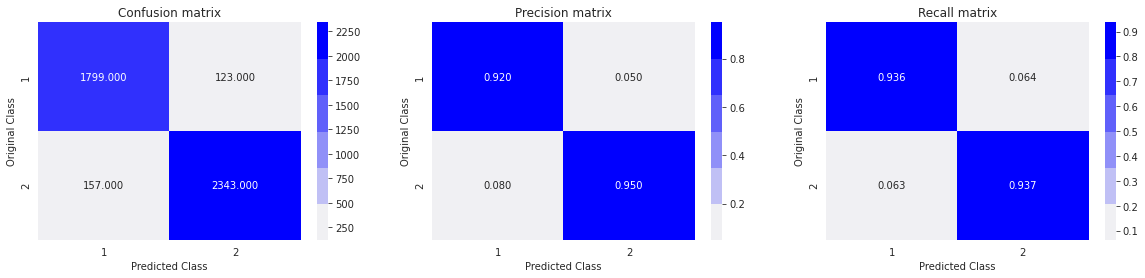

In [ ]:
plot_confusion_matrix(test_Y, knn_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


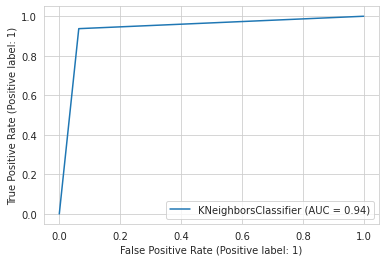

In [ ]:
plot_roc_curve(model_2,test_X, test_Y)

**Decision Tree Classifier**

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
model_3=dtree.fit(train_X,train_Y)
dtree_predict=model_3.predict(test_X)
print('The accuracy of Decision Tree Classifier is: ', 100.0 * accuracy_score(dtree_predict,test_Y))


The accuracy of Decision Tree Classifier is:  95.4093170511081


In [ ]:
print(classification_report(dtree_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.95      0.94      0.95      1937
           1       0.96      0.96      0.96      2485

    accuracy                           0.95      4422
   macro avg       0.95      0.95      0.95      4422
weighted avg       0.95      0.95      0.95      4422



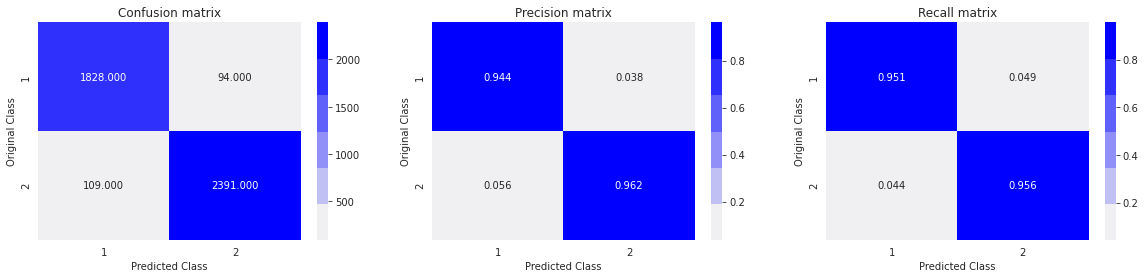

In [ ]:
plot_confusion_matrix(test_Y, dtree_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


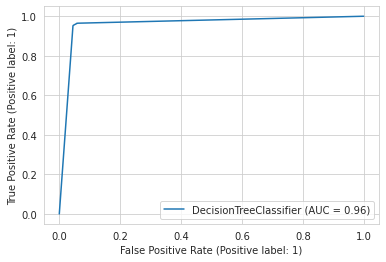

In [ ]:
plot_roc_curve(model_3,test_X, test_Y)

**Random Forest Classifier**

Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model_4=rfc.fit(train_X,train_Y)
rfc_predict=model_4.predict(test_X)
print('The accuracy of Random Forest Classifier is: ' , 100.0 * accuracy_score(rfc_predict,test_Y))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The accuracy of Random Forest Classifier is:  96.76616915422885


              precision    recall  f1-score   support

          -1       0.96      0.97      0.96      1911
           1       0.97      0.97      0.97      2511

    accuracy                           0.97      4422
   macro avg       0.97      0.97      0.97      4422
weighted avg       0.97      0.97      0.97      4422



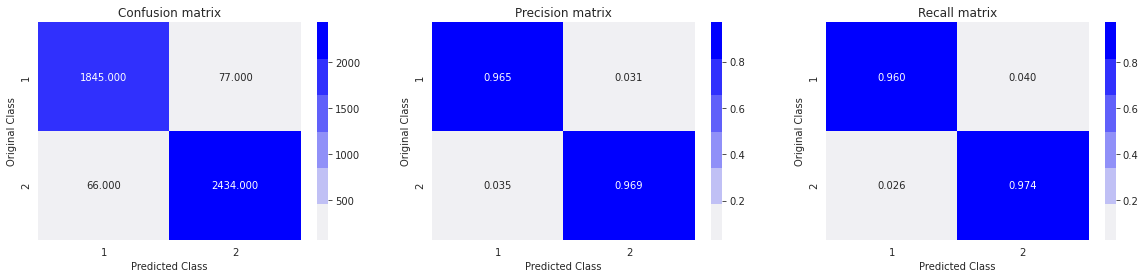

In [ ]:
print(classification_report(rfc_predict,test_Y))
plot_confusion_matrix(test_Y, rfc_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


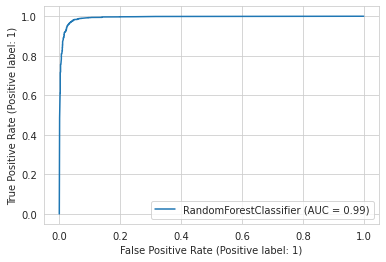

In [ ]:
plot_roc_curve(model_4,test_X, test_Y)

**Support Vector Machines**

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [ ]:
from sklearn.svm import SVC
svc=SVC()
model_5=svc.fit(train_X,train_Y)
svm_predict=model_5.predict(test_X)
print('The accuracy of SVM Classifier is: ', 100.0 * accuracy_score(svm_predict,test_Y))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of SVM Classifier is:  94.07507914970601


              precision    recall  f1-score   support

          -1       0.92      0.95      0.93      1858
           1       0.96      0.94      0.95      2564

    accuracy                           0.94      4422
   macro avg       0.94      0.94      0.94      4422
weighted avg       0.94      0.94      0.94      4422



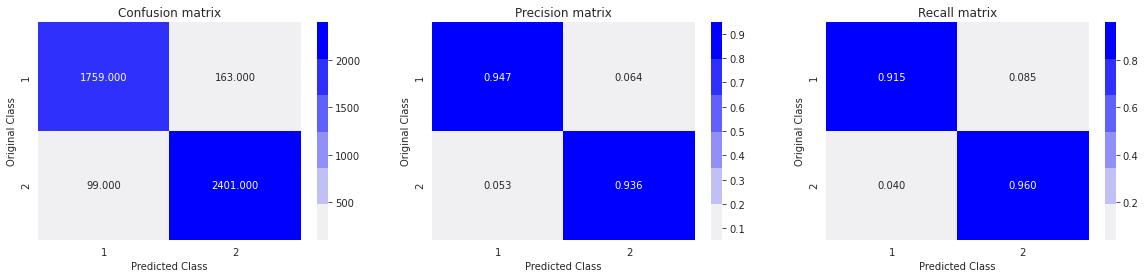

In [ ]:
print(classification_report(svm_predict,test_Y))
plot_confusion_matrix(test_Y, svm_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


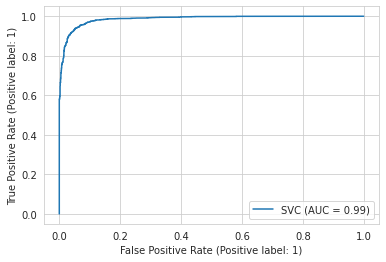

In [ ]:
plot_roc_curve(model_5,test_X, test_Y)

**Ada boost**

What this algorithm does is that it builds a model and gives equal weights to all the data points. It then assigns higher weights to points that are wrongly classified. Now all the points which have higher weights are given more importance in the next model. It will keep training models until and unless a lowe error is received.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier(n_estimators=5,learning_rate=1)
model_6=adc.fit(train_X,train_Y)
adc_predict=model_6.predict(test_X)
print('The accuracy of Ada Boost Classifier is: ', 100.0 * accuracy_score(adc_predict,test_Y))

The accuracy of Ada Boost Classifier is:  91.42921754862053


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

          -1       0.90      0.90      0.90      1919
           1       0.92      0.92      0.92      2503

    accuracy                           0.91      4422
   macro avg       0.91      0.91      0.91      4422
weighted avg       0.91      0.91      0.91      4422



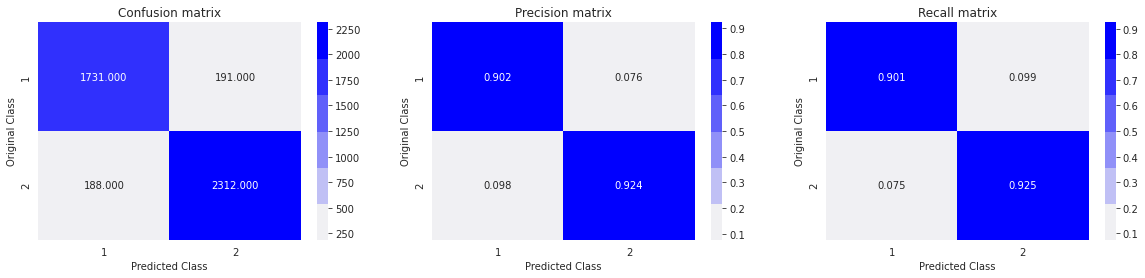

In [ ]:
print(classification_report(adc_predict,test_Y))
plot_confusion_matrix(test_Y, adc_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


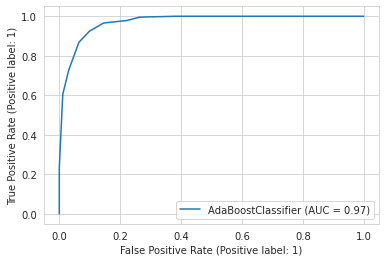

In [ ]:
plot_roc_curve(model_6,test_X, test_Y)

**XGBoost Classifier**

XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
model_7=xgb.fit(train_X,train_Y)
xgb_predict=model_7.predict(test_X)
print('The accuracy of XGBoost Classifier is: ' , 100.0 * accuracy_score(xgb_predict,test_Y))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of XGBoost Classifier is:  94.86657620985979


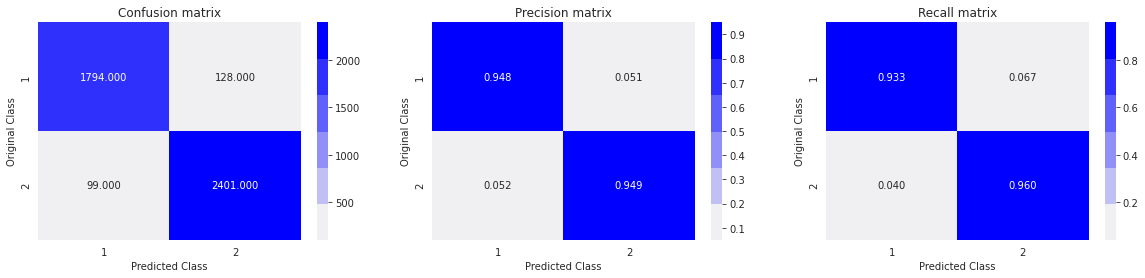

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


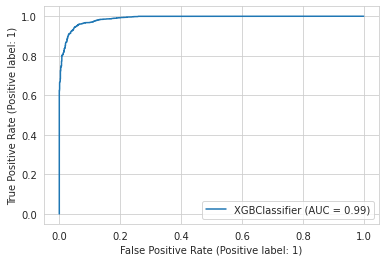

In [ ]:
plot_confusion_matrix(test_Y, xgb_predict)
plot_roc_curve(model_7,test_X, test_Y)

In [ ]:
print('Logistic Regression Accuracy:',100 * accuracy_score(logreg_predict,test_Y))
print('K-Nearest Neighbour Accuracy:',100* accuracy_score(knn_predict,test_Y))
print('Decision Tree Classifier Accuracy:',100* accuracy_score(dtree_predict,test_Y))
print('Random Forest Classifier Accuracy:',100*accuracy_score(rfc_predict,test_Y))
print('support Vector Machine Accuracy:',100*accuracy_score(svm_predict,test_Y))
print('Adaboost Classifier Accuracy:',100*accuracy_score(adc_predict,test_Y))
print('XGBoost Accuracy:',100*accuracy_score(xgb_predict,test_Y))

Logistic Regression Accuracy: 92.7860696517413
K-Nearest Neighbour Accuracy: 93.66802351876979
Decision Tree Classifier Accuracy: 95.4093170511081
Random Forest Classifier Accuracy: 96.76616915422885
support Vector Machine Accuracy: 94.07507914970601
Adaboost Classifier Accuracy: 91.42921754862053
XGBoost Accuracy: 94.86657620985979


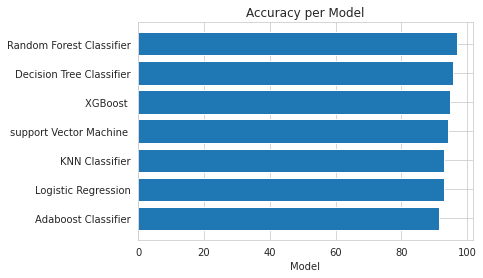

<Figure size 432x288 with 0 Axes>

In [ ]:
objects = ('Adaboost Classifier', 'Logistic Regression', 'KNN Classifier', 'support Vector Machine ', 'XGBoost ', 'Decision Tree Classifier', 'Random Forest Classifier')
y_pos = np.arange(len(objects))
performance = [91.42921754862053, 92.7860696517413, 93.08005427408412, 94.25599276345545, 94.86657620985979, 95.52238805970149, 96.85662596110357]
plt.barh(y_pos, performance, align='center', alpha=1.0)
plt.yticks(y_pos, objects)
plt.xlabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracy per Model')

plt.show()
plt.savefig('accuracy_per_model.png')